# Regressing to the mean

In [5]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


This notebook is a an intuitive introduction to the concept of linear regression. Partially based on Chapter 10 in the book [**Statistics** by Freedman, Pisani and Purves](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728) 

## A real-life example
http://www.math.uah.edu/stat/data/Pearson.html

In [16]:
!ls ../data/

Galton.csv  HW25000.csv Pearson.csv


In [17]:
HH=pd.read_csv('../data/Pearson.csv')
HH.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [18]:
# Copute some basic descritive statistics.
HH.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


In [19]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son'])
A.shape,y.shape

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w1

array([ 33.89280054,   0.51400591])

In [20]:
def f(x,w):
    return w[0]+w[1]*x

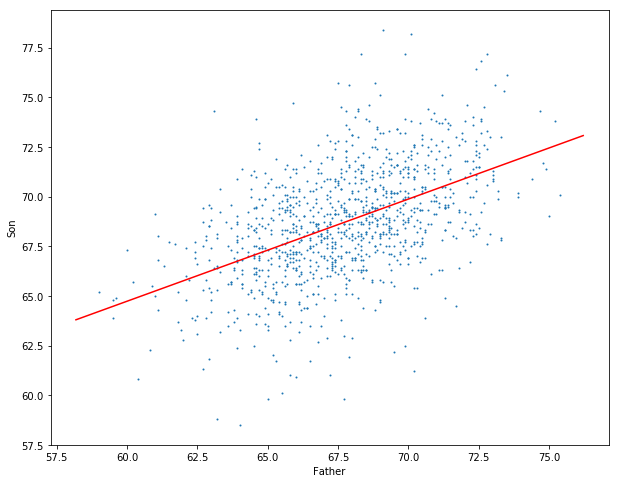

In [22]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son',figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r');

In [27]:
HH['Son-Father']=HH['Son']-HH['Father']

In [30]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son-Father'])
A.shape,y.shape

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w2

array([ 33.89280054,  -0.48599409])

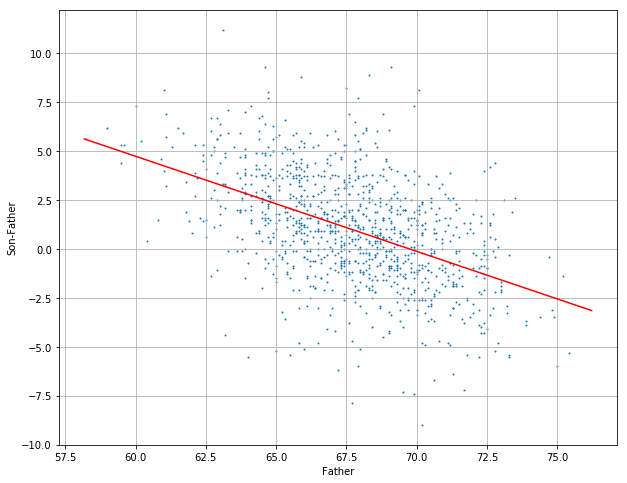

In [32]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son-Father',figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w2),f(x1,w2)],'r');
grid()